# Plot Gas Prices

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

sns.set_style("whitegrid")

In [2]:
countries = pd.read_excel("./data/gPrices.xlsx", sheet_name='countries', header=None)
prices = pd.read_excel("./data/gPrices.xlsx", sheet_name='prices', header=None)
Year = pd.to_datetime(pd.read_excel("./data/gPrices.xlsx", sheet_name='Year', header=None, dtype=str)[0])

We will display a warning that notifies users of missing data. The warning function will show the user the warning message we specify. We can specify the warning inside the function or as a variable that we pass to the function.

In [3]:
with_nan = prices.isna().any().to_list()
warning_message = "These countries contain missing data: " + ', '.join(countries.T[with_nan][0].to_list())
print(Warning(warning_message))

These countries contain missing data: Australia, Japan


Select a country.

In [4]:
def on_change(widget):
    x = widget['new'] 

country = widgets.Text( value='Japan',
                        placeholder='Type a country',
                        description='country',
                        disabled=False)

country.observe(on_change, names='value')
display(country)

Text(value='Japan', description='country', placeholder='Type a country')

Extract data for the chosen country.

In [5]:
country_prices = prices.iloc[:, countries.T[0].to_list().index(country.value)]

Make plot.

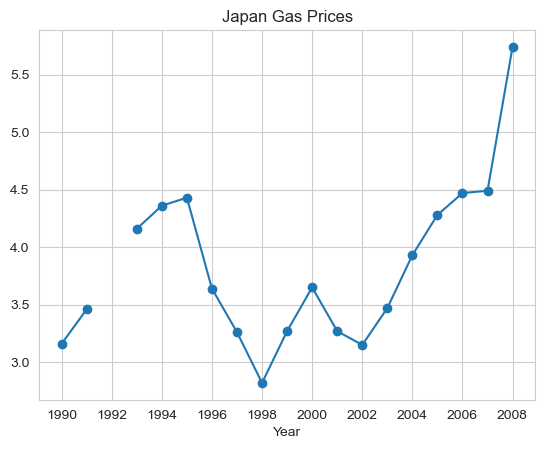

In [6]:
plt.figure()
plt.plot(Year, country_prices, marker='o')
plt.xlabel("Year")
plt.title(country.value + " Gas Prices")
plt.show()

It can be helpful to display messages to indicate the status of the program or to provide the user with additional guidance.

In [7]:
without_nan = [not(i) for i in with_nan]
warning_message = "These countries contain missing data: " + ', '.join(countries.T[without_nan][0].to_list())
print(warning_message)

These countries contain missing data: Canada, France, Germany, Italy, Mexico, South Korea, UK, USA
